In [1]:
import cv2 as cv
import numpy as np

from matplotlib import pyplot as plt

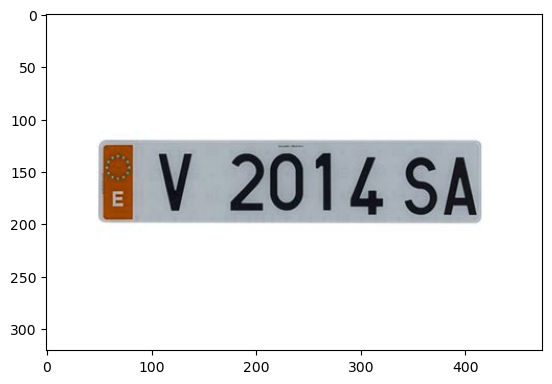

In [2]:
src = cv.imread("archives/matricula.jpg")
plt.imshow(src)

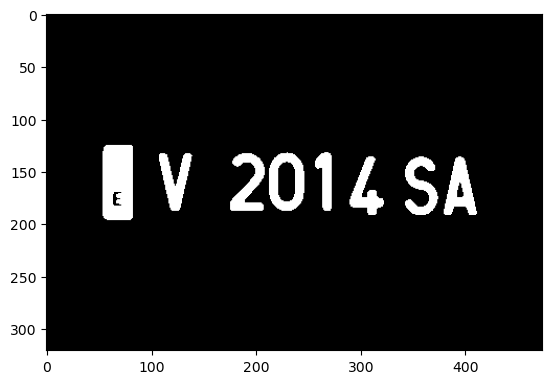

In [3]:
gris = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gris, (7,7), 0)
_, th = cv.threshold(blur, 127,255,cv.THRESH_BINARY_INV)
plt.imshow(th, cmap="gray")

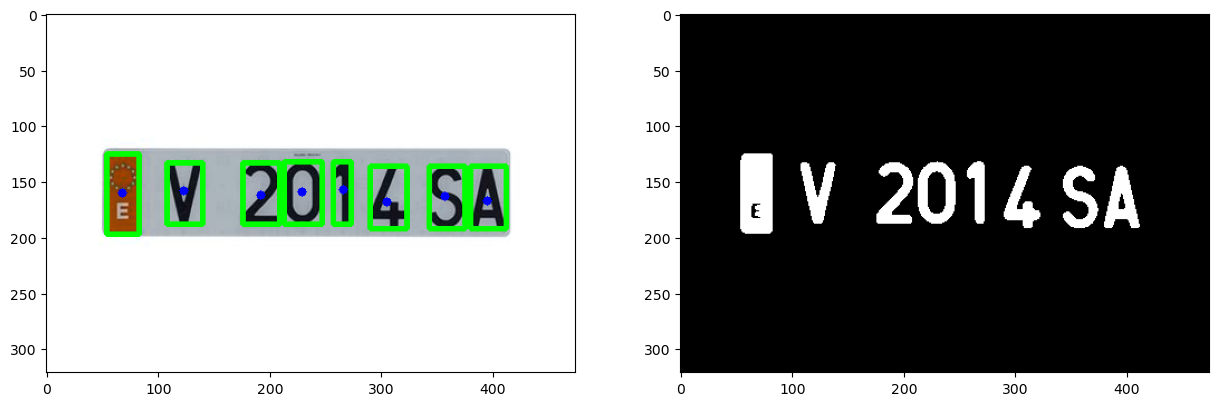

In [4]:
analisis = cv.connectedComponentsWithStats(th, connectivity=4, ltype = cv.CV_32S)
(total_labels, labels_ids, values, centroide) = analisis

salida = np.zeros(gris.shape, dtype="uint8")
img2 = src.copy()

for i in range(1, total_labels):
    area = values[i, cv.CC_STAT_AREA]
    x1 = values[i, cv.CC_STAT_LEFT]
    y1 = values[i, cv.CC_STAT_TOP]
    w = values[i, cv.CC_STAT_WIDTH]
    h = values[i, cv.CC_STAT_HEIGHT]

    mascara = (labels_ids == i).astype("uint8") * 255

    (x, y) = centroide[i]

    salida = cv.bitwise_or(salida, mascara)
    cv.rectangle(img2, (x1, y1), (x1+w, y1+h), (0,255,0), 3)
    cv.circle(img2, (int(x), int(y)), 4, (0,0,255), -1)

fig, axes = plt.subplots(1,2,figsize=(15, 15))
axes[0].imshow(img2)
axes[1].imshow(salida, cmap="gray")

In [5]:
labels_ids

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)